In [2]:
from gravipy.tensorial import * 
from sympy import init_printing
import inspect
init_printing()

Definition of coordinates and a covariant space-time metric in general, static isotropic metic:

$$x^\mu=(t,r,\theta,\phi)\quad, \qquad g_{\mu\nu}=\left( \begin{array}{ccc} A(r) & 0 & 0 & 0\\ 0&  -B(r)&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$

Schwarzschildmetrik:
$$ g_{\mu\nu}=\left( \begin{array}{ccc} 1-\frac{2\,M}{r} & 0 & 0 & 0\\ 0&  -\frac{1}{1-\frac{2\,M}{r}}&  0&0 \\ 0&  0&  -r^2& 0\\ 0&  0&  0& -r^2 \hbox{sin}^2(\theta)\\ \end{array} \right)$$


In [3]:
# define some symbolic variables
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M')
A = Function('A')(r)
B = Function('B')(r)
# create a coordinate four-vector object instantiating 
# the Coordinates class
x = Coordinates('x', [t, r, theta, phi])
# define a matrix of a metric tensor components
#Metric = diag((1-2*M/r), -1/(1-2*M/r), -r**2, -r**2*sin(theta)**2)
Metric = diag(A, -B, -r**2, -r**2*sin(theta)**2)
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g', x, Metric)

In [4]:
g(All, All)

⎡A(r)    0     0          0        ⎤
⎢                                  ⎥
⎢ 0    -B(r)   0          0        ⎥
⎢                                  ⎥
⎢               2                  ⎥
⎢ 0      0    -r          0        ⎥
⎢                                  ⎥
⎢                    2    2        ⎥
⎣ 0      0     0   -r ⋅sin (\theta)⎦

In [5]:
g(-All, -All)

⎡ 1                              ⎤
⎢────   0     0          0       ⎥
⎢A(r)                            ⎥
⎢                                ⎥
⎢      -1                        ⎥
⎢ 0    ────   0          0       ⎥
⎢      B(r)                      ⎥
⎢                                ⎥
⎢            -1                  ⎥
⎢ 0     0    ───         0       ⎥
⎢              2                 ⎥
⎢             r                  ⎥
⎢                                ⎥
⎢                       -1       ⎥
⎢ 0     0     0   ───────────────⎥
⎢                  2    2        ⎥
⎣                 r ⋅sin (\theta)⎦

partial derivative: 
$$\partial_\mu = \frac{\partial}{\partial x^\mu}$$
$$ g_{\mu\nu| \alpha} := \partial_\alpha g_{\mu\nu} = \frac{\partial }{\partial x^\alpha}g_{\mu\nu} $$

In [6]:
g.partialD(1, 2, 2)

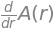

In [7]:
g(1,1).diff(x(-2))

Die Chistoffel Symbole in (kontravarianter Form): 
$$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu| \nu} + g_{\rho \nu| \mu} - g_{\mu \nu| \rho})$$

Hier speziell $$ \Gamma_{2 2 2} = \Gamma_{r r r}$$

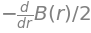

In [8]:
Ga = Christoffel('Ga', g)
Ga(2, 2, 2)

Die kovariante Ableitung eines Tensors zweiter Stufe $T^\mu{}\!_\nu$ ist wie folgt definiert:

$$
\nabla\!_\alpha T^\mu{}\!_\nu = \partial_\alpha T^\mu{}\!_\nu + \Gamma^\mu_{\alpha \rho} T^\rho{}\!_\nu  - \Gamma^\rho_{\alpha \nu} T^\mu{}\!_\rho   
$$

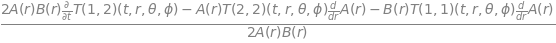

In [9]:
T = Tensor('T', 2, g)
T.covariantD(1,2,1) 
# Beachten Sie, dass die ersten zwei Zahlen die Indices des Tensors 
# und dritte Zahl die Koordinate angibt nach der differenziert wird

Die kovariante Ableitung der Metric $g_{\mu \nu}$ ist identisch 0.

In [10]:
g.covariantD(1,1,2)

Der Riemann Tensor:
$$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

Hier speziell $$ R_{1 3 1 3} =  R_{t \theta t \theta} $$

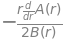

In [11]:
Rm = Riemann('Rm', g)
Rm(1,3,1,3)

Oder in gemischt kontra- kovarianter Form $$ R^{1}{}_{3 1 3} = R^{t}{}_{\theta t \theta}  $$

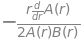

In [12]:
Rm(-1,3,1,3)

Der Ricci Tensor:

$$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \mu \nu}\Gamma^{\rho}_{\ \sigma \rho} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

In [13]:
Ri = Ricci('Ri', g)
Ri(All, All)

⎡  2                                                                          
⎢ d                                        2                                  
⎢───(A(r))   d        d          ⎛d       ⎞    d                              
⎢  2         ──(A(r))⋅──(B(r))   ⎜──(A(r))⎟    ──(A(r))                       
⎢dr          dr       dr         ⎝dr      ⎠    dr                             
⎢───────── - ───────────────── - ─────────── + ────────                       
⎢  2⋅B(r)            2           4⋅A(r)⋅B(r)    r⋅B(r)                        
⎢                 4⋅B (r)                                                     
⎢                                                                             
⎢                                                            2                
⎢                                                           d                 
⎢                                                          ───(A(r))   d      
⎢                                                   

Der Ricci Tensor lässt sich auch durch folgende Kontraktion aus dem Riemann Tensor berechnen:
$R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

In [14]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

⎡  2                                                                          
⎢ d                                        2                                  
⎢───(A(r))   d        d          ⎛d       ⎞    d                              
⎢  2         ──(A(r))⋅──(B(r))   ⎜──(A(r))⎟    ──(A(r))                       
⎢dr          dr       dr         ⎝dr      ⎠    dr                             
⎢───────── - ───────────────── - ─────────── + ────────                       
⎢  2⋅B(r)            2           4⋅A(r)⋅B(r)    r⋅B(r)                        
⎢                 4⋅B (r)                                                     
⎢                                                                             
⎢                                                            2                
⎢                                                           d                 
⎢                                                          ───(A(r))   d      
⎢                                                   

Der Ricci Skalar ergibt sich aus der Kontraktion des Ricci Tensors: $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$

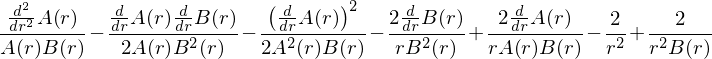

In [14]:
Ri.scalar()

Der Einstein Tensor:$$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

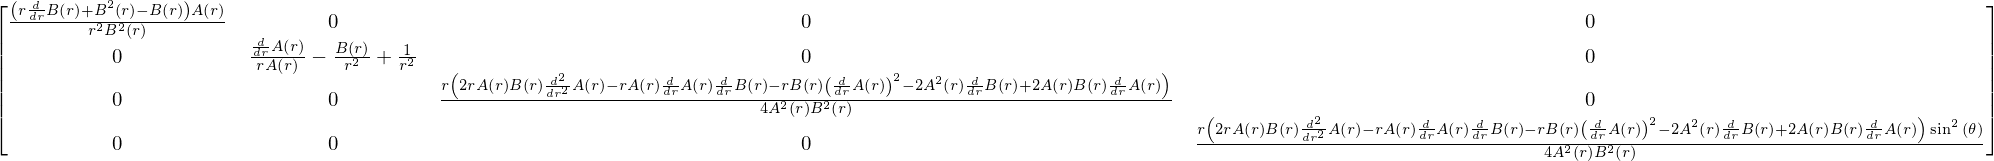

In [15]:
G = Einstein('G', Ri)
G(All, All)